In [1]:
import acquire
import prepare
import explore
import scipy.stats as stats

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Project Goals:
- These are my goals.

## Exercutive Summary:
- My findings are:

### Acquire Data

In [2]:
df = acquire.get_new_telco_churn_data()

In [3]:
df.sample(5)

,payment_type_id,payment_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type_id,internet_service_type,contract_type_id,contract_type
1639,1,Electronic check,5144-TVGLP,Male,1,No,No,38,Yes,Yes,...,1,No,1,94.75,3653,No,2,Fiber optic,1,Month-to-month
1176,1,Electronic check,3049-SOLAY,Female,0,Yes,No,3,Yes,Yes,...,1,Yes,1,95.20,292.85,Yes,2,Fiber optic,1,Month-to-month
5307,2,Mailed check,9289-LBQVU,Male,0,Yes,No,64,Yes,Yes,...,2,Yes,2,70.15,4480.7,No,1,DSL,2,One year
4647,3,Bank transfer (automatic),7432-FFVAR,Female,0,Yes,Yes,46,Yes,No,...,2,No,3,90.95,4236.6,No,2,Fiber optic,2,One year
2064,3,Bank transfer (automatic),7130-YXBRO,Male,0,Yes,No,48,Yes,Yes,...,1,Yes,3,111.45,5315.1,No,2,Fiber optic,1,Month-to-month


In [4]:
print('My dataframe has', df.shape[0], 'rows and', df.shape[1], 'columns')

My dataframe has 7043 rows and 27 columns


In [5]:
# let's take a look at our columns and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   payment_type              7043 non-null   object 
 2   customer_id               7043 non-null   object 
 3   gender                    7043 non-null   object 
 4   senior_citizen            7043 non-null   int64  
 5   partner                   7043 non-null   object 
 6   dependents                7043 non-null   object 
 7   tenure                    7043 non-null   int64  
 8   phone_service             7043 non-null   object 
 9   multiple_lines            7043 non-null   object 
 10  internet_service_type_id  7043 non-null   int64  
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

## Acquire takeaways:
- From my sql query.
- Imported from my get telco churn df function.
- There are duplicate columns from the query.
- Many columns we need to convert.

## PREPARE

In [6]:
# Let's take a quick look at my values for specific columns
churned_df = df[df['churn']=='Yes']
explore.value_counts(churned_df)

payment_type
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: payment_type, dtype: int64
-------------
gender
Female    939
Male      930
Name: gender, dtype: int64
-------------
senior_citizen
0    1393
1     476
Name: senior_citizen, dtype: int64
-------------
partner
No     1200
Yes     669
Name: partner, dtype: int64
-------------
dependents
No     1543
Yes     326
Name: dependents, dtype: int64
-------------
phone_service
Yes    1699
No      170
Name: phone_service, dtype: int64
-------------
multiple_lines
Yes                 850
No                  849
No phone service    170
Name: multiple_lines, dtype: int64
-------------
online_security
No                     1461
Yes                     295
No internet service     113
Name: online_security, dtype: int64
-------------
online_backup
No                     1233
Yes                     523
No internet service     113
Name: online_backup,

- Right off the bat I can see which columns don't appear to have an obvious association to churn:
 - streaming_movies
 - streaming_tv
 - multiple_lines
 - gender
 -------------
- This helps me summarize which features may be more important for my dataframe.

In [8]:
# this function drops columns mentioned above, removes duplicate columns, changes strings to floats (where necessary), drops nulls, and changes my Yes and No columns to binary.
df = prepare.prep_telco_data(df)

In [8]:
df.sample(3).T

,3783,4684,6623
payment_type,Mailed check,Bank transfer (automatic),Electronic check
customer_id,9117-SHLZX,8213-TAZPM,3566-CAAYU
senior_citizen,0,0,0
partner,0,1,1
dependents,0,1,1
tenure_in_months,1,69,64
phone_service,1,1,0
online_security,0,0,0
online_backup,0,1,1
device_protection,0,1,1


In [9]:
df.dtypes

payment_type              object
customer_id               object
senior_citizen             int64
partner                    int64
dependents                 int64
tenure_in_months           int64
phone_service              int64
online_security            int64
online_backup              int64
device_protection          int64
tech_support               int64
paperless_billing          int64
monthly_charges          float64
total_charges            float64
churn                      int64
internet_service_type     object
contract_type             object
dtype: object

In [10]:
print('My dataframe now has', df.shape[0], 'rows and', df.shape[1], 'columns')

My dataframe now has 7032 rows and 17 columns


In [11]:
train, validate, test = prepare.telco_split(df)

In [12]:
train.shape, validate.shape, test.shape

((3937, 17), (1688, 17), (1407, 17))

In [13]:
train.head().T

,5399,2876,659,5843,2229
payment_type,Mailed check,Electronic check,Mailed check,Bank transfer (automatic),Bank transfer (automatic)
customer_id,0831-JNISG,1963-SVUCV,0611-DFXKO,7696-CFTAT,7916-VCCPB
senior_citizen,0,0,0,0,0
partner,1,0,1,1,1
dependents,1,0,0,1,1
tenure_in_months,71,1,20,37,16
phone_service,1,1,1,1,1
online_security,0,0,0,0,0
online_backup,0,0,0,0,1
device_protection,0,0,0,0,0


In [14]:
# create a for loop visual for columns I want to train my model with
# for i in df.columns:
#     sns.countplot(data=train, x=i, hue='churn')
#     plt.show()

Text(0.5, 1.0, 'Feautures Correlating with Churn')

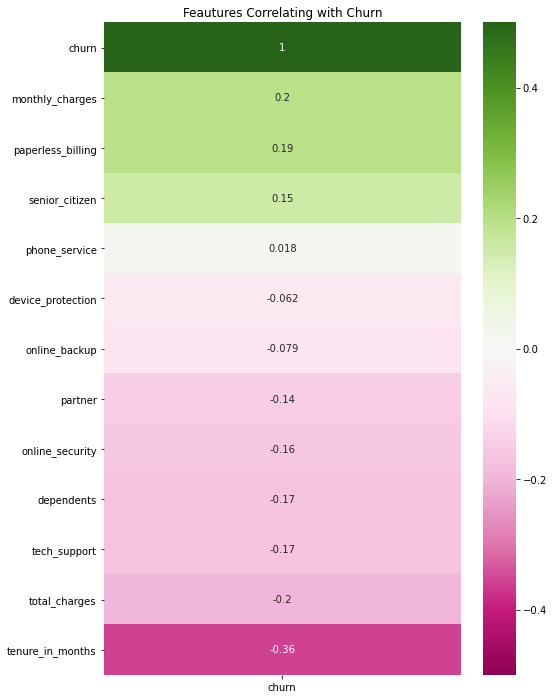

In [17]:
plt.figure(figsize=(8,12))
churn_heatmap = sns.heatmap(train.corr()[['churn']].sort_values(by='churn', ascending=False), cmap='PiYG', vmin=-.5, vmax=.5, annot=True)
churn_heatmap.set_title('Feautures Correlating with Churn')

In [16]:
train = prepare.create_dummies(train)
validate = prepare.create_dummies(validate)
test = prepare.create_dummies(test)

In [17]:
train.shape, validate.shape, test.shape

((3937, 21), (1688, 21), (1407, 21))